<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Regresi%C3%B3n_Lineal%20/R_Simple/Private_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Mexico_Outliers_y_Categorización.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)


,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(2 - 5) Reseñas mensuales moderadas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
#Realizamos un conteo de los tipos de habitaciones
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,17432
Private room,2,8581
Shared room,3,401
Hotel room,1,122


In [4]:
#Realizamos un frame con las variables a utilizar
df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [5]:
df1["room_type_num"].value_counts()

,count
room_type_num,
0,17432
2,8581
3,401
1,122


## División del frame por tipo de habitación

Hotel room/apt no. 1

In [6]:
df_Private=df1[df1["room_type_num"]== 2]
df_Private

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,2,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,2,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,2,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,2,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,2,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...
26510,2,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,2,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,2,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,2,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


# Filtro de “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

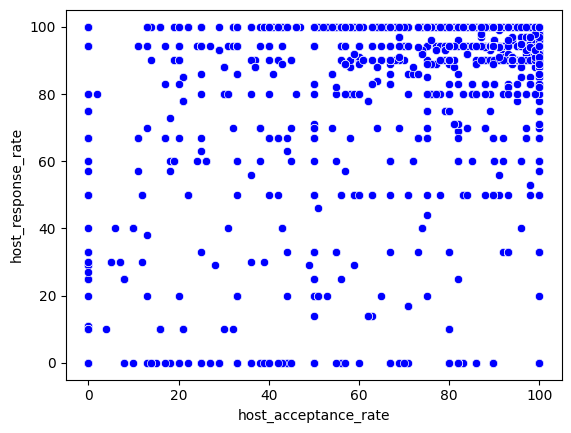

In [7]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='host_response_rate', color="blue", data=df_Private)

In [8]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Private[['host_acceptance_rate']]
var_Dep= df_Private['host_response_rate']

In [9]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [10]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [12]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.36252292]),
 'rank_': 1,
 'singular_': array([2432.85124495]),
 'intercept_': 60.699005555157775}

**Modelo matemático: Y = 0.36252292x + 60.699005555157775**

---






In [13]:
#Predecimos los valores de host_response_rate a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Private[['host_acceptance_rate']])
y_pred

array([93.25356343, 96.95129717, 89.70083885, ..., 95.86372842,
       83.53794927, 93.25356343])

In [14]:
#Insertamos la columna de predicciones en el DataFrame
df_Private.insert(0, 'Predict1', y_pred)
df_Private

,Predict1,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,93.253563,2,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,96.951297,2,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,89.700839,2,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,93.253563,2,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,96.951297,2,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26510,89.700839,2,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,96.951297,2,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,95.863728,2,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,83.537949,2,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

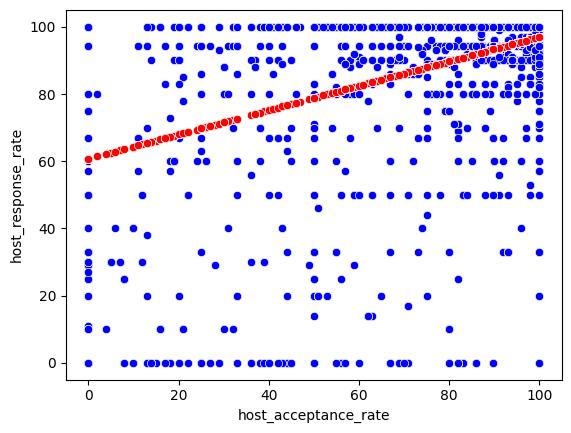

In [15]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color='blue', data=df_Private)
sns.scatterplot(x='host_acceptance_rate', y='Predict1', color='red', data=df_Private)


In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.20414266700941075

In [17]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.45182149905622104

## Filtro de "“host_acceptance_rate vs price”

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

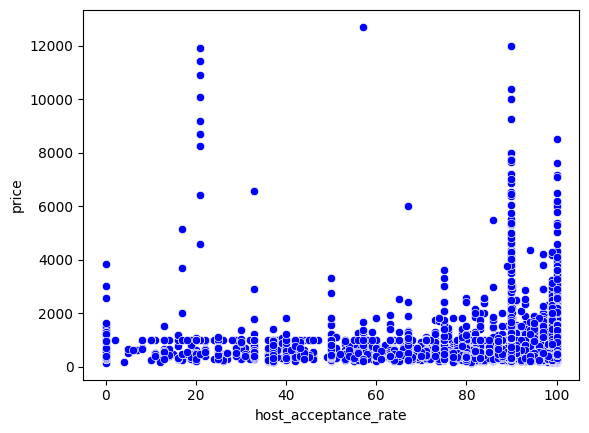

In [18]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='price', color="blue", data=df_Private)

In [19]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Private[['host_acceptance_rate']]
var_Dep= df_Private['price']

In [20]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [21]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [22]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [23]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.43782665]),
 'rank_': 1,
 'singular_': array([2432.85124495]),
 'intercept_': 764.0130467265741}

**Modelo matemático: Y = 0.43782665x + 764.0130467265741**

In [24]:
#Predecimos los valores de price a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Private[['host_acceptance_rate']])
y_pred

array([803.32988024, 807.7957121 , 799.03917903, ..., 806.48223214,
       791.59612591, 803.32988024])

In [25]:
#Insertamos la columna de predicciones en el DataFrame
df_Private.insert(1, 'Predict2', y_pred)
df_Private

,Predict1,Predict2,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,93.253563,803.329880,2,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,96.951297,807.795712,2,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,89.700839,799.039179,2,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,93.253563,803.329880,2,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,96.951297,807.795712,2,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,89.700839,799.039179,2,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,96.951297,807.795712,2,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,95.863728,806.482232,2,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,83.537949,791.596126,2,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

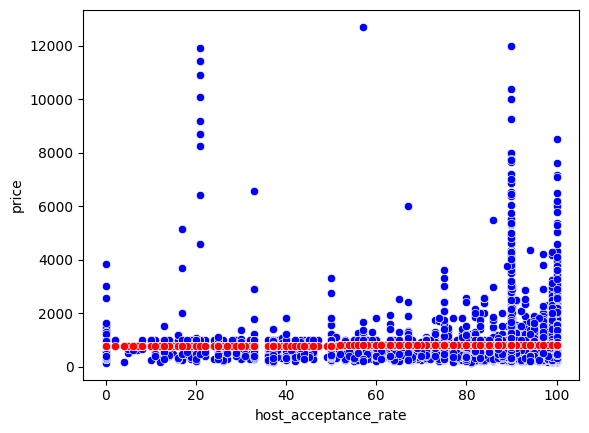

In [26]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=df_Private)
sns.scatterplot(x='host_acceptance_rate', y='Predict2', color='red', data=df_Private)


In [27]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.00023146902592019458

In [28]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.015214106149235143

## Filtro para “host_acceptance_rate vs number_of_reviews ”

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

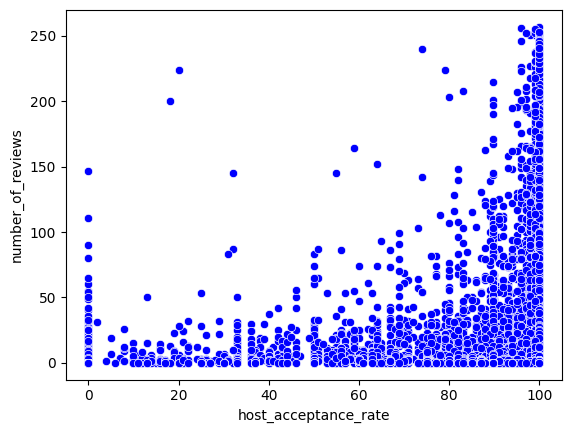

In [29]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='number_of_reviews', color="blue", data=df_Private)

In [30]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Private[['host_acceptance_rate']]
var_Dep= df_Private['number_of_reviews']

In [31]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [32]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [33]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [34]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.34963796]),
 'rank_': 1,
 'singular_': array([2432.85124495]),
 'intercept_': -4.170136693015795}

**Modelo matemático: y = 0.34963796x -4.170136693015795**

In [35]:
#Predecimos los valores de number_of_reviews a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Private[['host_acceptance_rate']])
y_pred

array([27.22735215, 30.79365934, 23.80090014, ..., 29.74474546,
       17.85705481, 27.22735215])

In [36]:
#Insertamos la columna de predicciones en el DataFrame
df_Private.insert(2, 'Predict3', y_pred)
df_Private

,Predict1,Predict2,Predict3,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,93.253563,803.329880,27.227352,2,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,96.951297,807.795712,30.793659,2,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,89.700839,799.039179,23.800900,2,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,93.253563,803.329880,27.227352,2,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,96.951297,807.795712,30.793659,2,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,89.700839,799.039179,23.800900,2,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,96.951297,807.795712,30.793659,2,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,95.863728,806.482232,29.744745,2,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,83.537949,791.596126,17.857055,2,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

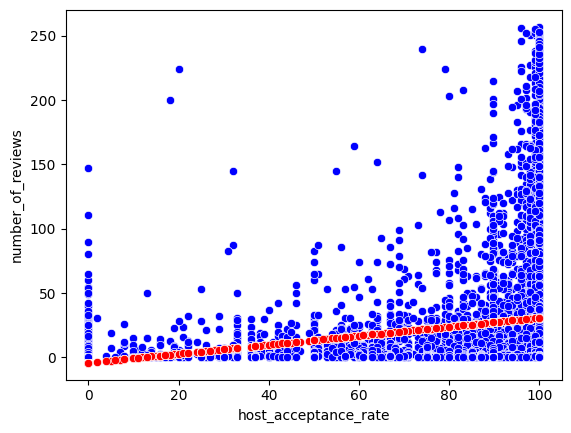

In [37]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color='blue', data=df_Private)
sns.scatterplot(x='host_acceptance_rate', y='Predict3', color='red', data=df_Private)

In [38]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.047445932687816605

In [39]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.21782087293879024

# Filtro de "“review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

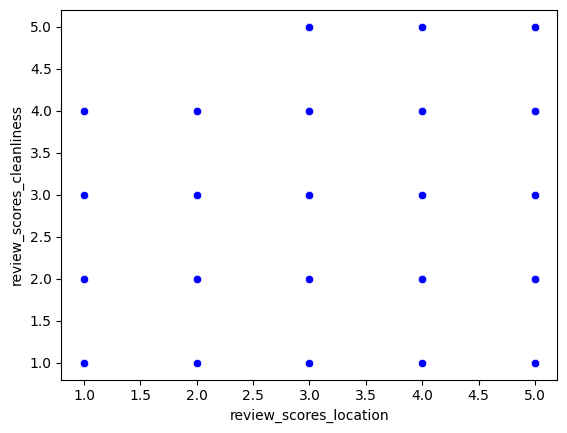

In [40]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'review_scores_location', y='review_scores_cleanliness', color="blue", data=df_Private)

In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Private[['review_scores_location']]
var_Dep= df_Private['review_scores_cleanliness']

In [42]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [43]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [44]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [45]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.68109808]),
 'rank_': 1,
 'singular_': array([31.80483986]),
 'intercept_': 1.4988382611612865}

**Modelo matemático: Y = 0.68109808x + 1.4988382611612865**

In [46]:
#Predecimos los valores de review_scores_cleanliness a partir de la variable review_scores_location
y_pred= model.predict(X=df_Private[['review_scores_location']])
y_pred

array([4.90432866, 4.90432866, 4.90432866, ..., 4.90432866, 4.90432866,
       4.90432866])

In [47]:
#Insertamos la columna de predicciones en el DataFrame
df_Private.insert(3, 'Predict4', y_pred)
df_Private

,Predict1,Predict2,Predict3,Predict4,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,93.253563,803.329880,27.227352,4.904329,2,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,96.951297,807.795712,30.793659,4.904329,2,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,89.700839,799.039179,23.800900,4.904329,2,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,93.253563,803.329880,27.227352,4.904329,2,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,96.951297,807.795712,30.793659,4.904329,2,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,89.700839,799.039179,23.800900,4.904329,2,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,96.951297,807.795712,30.793659,4.904329,2,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,95.863728,806.482232,29.744745,4.904329,2,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,83.537949,791.596126,17.857055,4.904329,2,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

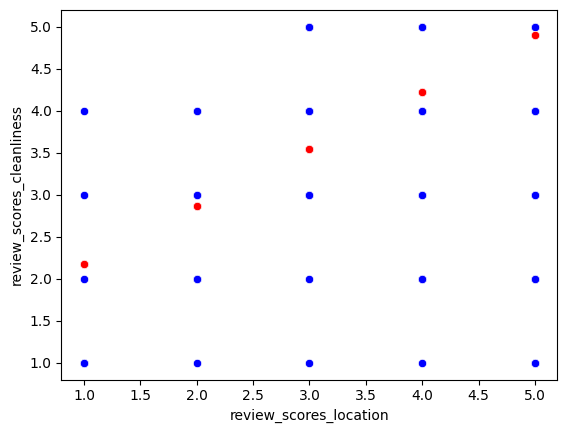

In [48]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=df_Private)
sns.scatterplot(x='review_scores_location', y='Predict4', color='red', data=df_Private)


In [49]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.28585617014130227

In [50]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.5346551880804135

# Filtro para “availability_365 vs number_of_reviews”

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

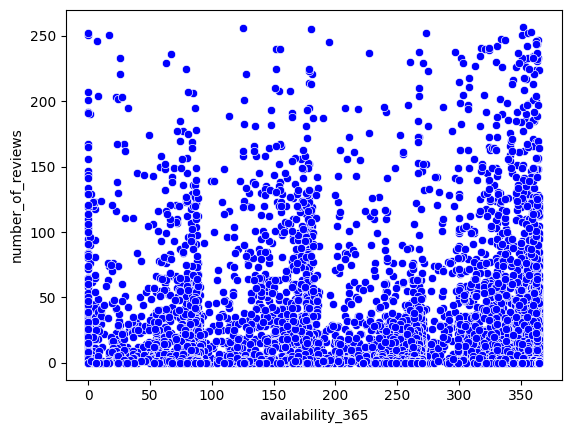

In [51]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'availability_365', y='number_of_reviews', color="blue", data=df_Private)

In [52]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Private[['availability_365']]
var_Dep= df_Private['number_of_reviews']

In [53]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [54]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [55]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [56]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01689682]),
 'rank_': 1,
 'singular_': array([12030.03997046]),
 'intercept_': 21.776286557899134}

**Modelo matemático: Y = 0.01689682x + 21.776286557899134**

In [57]:
#Predecimos los valores de number_of_reviews a partir de la variable availability_365
y_pred= model.predict(X=df_Private[['availability_365']])
y_pred

array([21.77628656, 25.69634803, 27.36913288, ..., 26.33842706,
       27.5887915 , 27.94362465])

In [58]:
#Insertamos la columna de predicciones en el DataFrame
df_Private.insert(4, 'Predict5', y_pred)
df_Private

,Predict1,Predict2,Predict3,Predict4,Predict5,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,93.253563,803.329880,27.227352,4.904329,21.776287,2,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,96.951297,807.795712,30.793659,4.904329,25.696348,2,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,89.700839,799.039179,23.800900,4.904329,27.369133,2,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,93.253563,803.329880,27.227352,4.904329,27.926728,2,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,96.951297,807.795712,30.793659,4.904329,27.166371,2,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,89.700839,799.039179,23.800900,4.904329,27.943625,2,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,96.951297,807.795712,30.793659,4.904329,26.338427,2,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,95.863728,806.482232,29.744745,4.904329,26.338427,2,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,83.537949,791.596126,17.857055,4.904329,27.588791,2,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

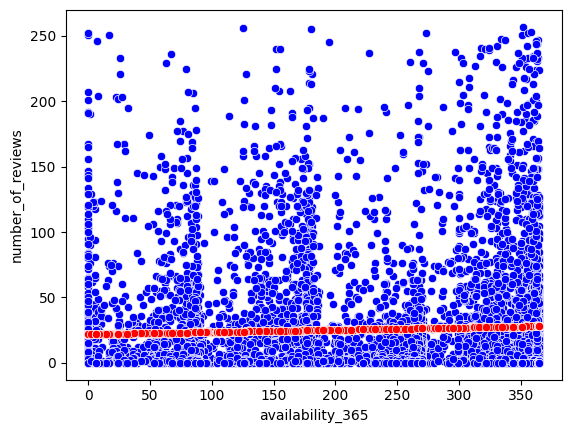

In [59]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='availability_365', y='number_of_reviews', color='blue', data=df_Private)
sns.scatterplot(x='availability_365', y='Predict5', color='red', data=df_Private)

In [60]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.002709409490651127

In [61]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.05205198834483777

# Filtro para “reviews_per_month vs review_scores_communication”

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

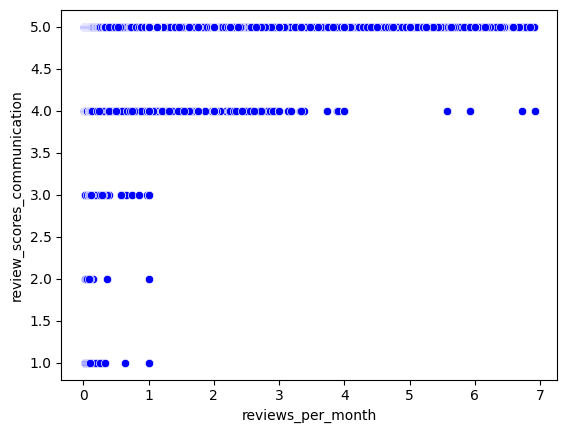

In [62]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'reviews_per_month', y='review_scores_communication', color="blue", data=df_Private)

In [63]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Private[['reviews_per_month']]
var_Dep= df_Private['review_scores_communication']

In [64]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [65]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [66]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [67]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.03931475]),
 'rank_': 1,
 'singular_': array([106.31975288]),
 'intercept_': 4.865886927011366}

**Modelo matemático: Y = 0.03931475x + 4.865886927011366**

In [68]:
#Predecimos los valores de review_scores_communication a partir de la variable reviews_per_month
y_pred= model.predict(X=df_Private[['reviews_per_month']])
y_pred

array([4.9103126 , 4.88593745, 4.89930447, ..., 4.9103126 , 4.9103126 ,
       4.9103126 ])

In [69]:
#Insertamos la columna de predicciones en el DataFrame
df_Private.insert(5, 'Predict6', y_pred)
df_Private

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,93.253563,803.329880,27.227352,4.904329,21.776287,4.910313,2,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,96.951297,807.795712,30.793659,4.904329,25.696348,4.885937,2,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,89.700839,799.039179,23.800900,4.904329,27.369133,4.899304,2,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,93.253563,803.329880,27.227352,4.904329,27.926728,4.874536,2,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,96.951297,807.795712,30.793659,4.904329,27.166371,4.912278,2,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,89.700839,799.039179,23.800900,4.904329,27.943625,4.910313,2,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,96.951297,807.795712,30.793659,4.904329,26.338427,4.910313,2,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,95.863728,806.482232,29.744745,4.904329,26.338427,4.910313,2,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,83.537949,791.596126,17.857055,4.904329,27.588791,4.910313,2,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

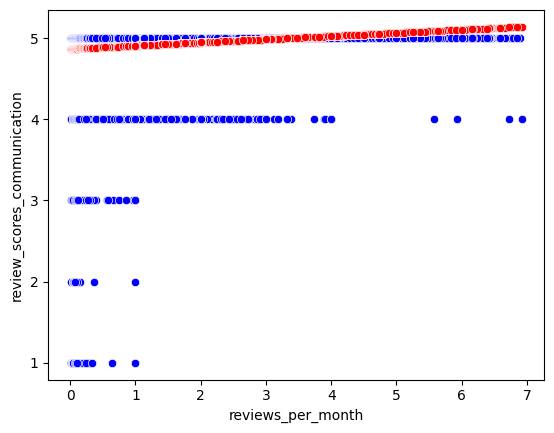

In [70]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='blue', data=df_Private)
sns.scatterplot(x='reviews_per_month', y='Predict6', color='red', data=df_Private)

In [71]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.01469131946425506

In [72]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.1212077533174139

## Creación del modelo matemático

In [73]:
# Modelo usando las regresiones lineales
dfModel = df_Private[df_Private["room_type_num"] == 2]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,93.253563,803.329880,27.227352,4.904329,21.776287,4.910313,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,96.951297,807.795712,30.793659,4.904329,25.696348,4.885937,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,89.700839,799.039179,23.800900,4.904329,27.369133,4.899304,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,93.253563,803.329880,27.227352,4.904329,27.926728,4.874536,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,96.951297,807.795712,30.793659,4.904329,27.166371,4.912278,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,89.700839,799.039179,23.800900,4.904329,27.943625,4.910313,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,96.951297,807.795712,30.793659,4.904329,26.338427,4.910313,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,95.863728,806.482232,29.744745,4.904329,26.338427,4.910313,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,83.537949,791.596126,17.857055,4.904329,27.588791,4.910313,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


In [74]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.573411
reviews_per_month,0.488394
Predict6,0.488394
Predict2,0.217821
Predict3,0.217821
Predict1,0.217821
host_acceptance_rate,0.217821


<Axes: >

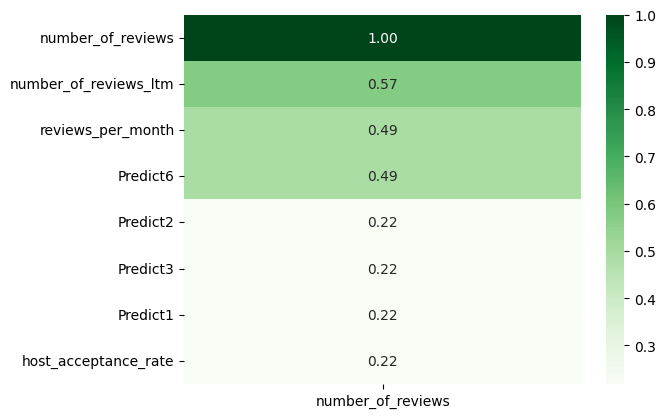

In [75]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map1

In [76]:
# Modelo original
df = df[df["room_type_num"] == 2]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
10,647454,2011,94.3,89.8,0.0,3,1,0,19.354160,-99.164880,...,0,0.0,1.13,991.0,1.0,10.0,2,3,4,3
13,1664327,2012,100.0,100.0,1.0,2,1,1,19.340340,-99.183450,...,232,66.0,0.51,366.0,1.0,50.0,2,3,3,3
14,816295,2011,100.0,80.0,1.0,2,1,1,19.396750,-99.175810,...,331,107.0,0.85,315.0,1.0,24.0,1,3,4,2
15,22366411,2014,94.3,89.8,0.0,2,1,0,19.405920,-99.169100,...,364,30.0,0.22,898.0,1.0,52.0,4,3,5,1
17,5870021,2013,100.0,100.0,0.0,5,1,1,19.354450,-99.162510,...,319,152.0,1.18,1200.0,1.0,29.0,2,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,41666883,2015,94.3,80.0,0.0,2,1,1,19.386376,-99.150102,...,365,0.0,1.13,365.0,1.0,5.0,1,3,3,2
26514,210503403,2018,94.3,100.0,0.0,1,1,1,19.400410,-99.155426,...,270,0.0,1.13,450.0,1.0,19.0,1,3,4,2
26515,108728752,2016,100.0,97.0,0.0,14,1,1,19.497344,-99.126527,...,270,0.0,1.13,509.0,1.0,7.0,5,3,3,1
26519,524946474,2023,83.0,63.0,0.0,3,1,1,19.430330,-99.168691,...,344,0.0,1.13,1939.0,2.0,19.0,4,2,4,1


In [77]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2


,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.573411
reviews_per_month,0.488394
number_of_reviews_l30d,0.349347
host_is_superhost,0.265068
maximum_nights_avg_ntm,0.231589
host_acceptance_rate,0.217821
amenities_num,0.213049


<Axes: >

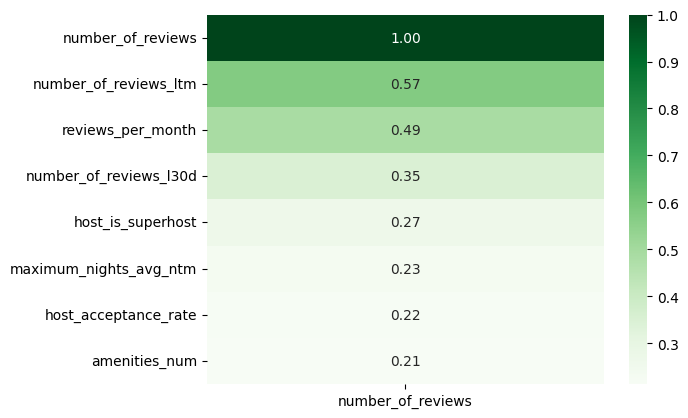

In [78]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

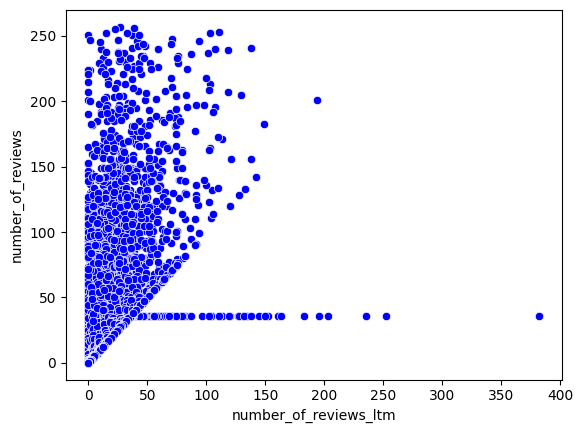

In [79]:
# Para "Private Room"
# el mejor modelo matemático simple que describe de mejor manera el número de reseñas es:
from turtle import color
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = df_Private)

In [80]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df_Private[["number_of_reviews_ltm"]]
Var_Dep = df_Private[["number_of_reviews"]]

In [81]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.33166699]]),
 'rank_': 1,
 'singular_': array([1681.53114226]),
 'intercept_': array([13.32959747])}

**Modelo matemático: Y = 1.3316669x + 13.32959747**

In [82]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "number_of_reviews_ltm"
y_pred = model.predict(X = df_Private[['number_of_reviews_ltm']])
y_pred
# Insertamos la columna de preddiciones en el df
df_Private.insert(6, 'PredictFinal', y_pred)
df_Private

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,PredictFinal,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
10,93.253563,803.329880,27.227352,4.904329,21.776287,4.910313,13.329597,2,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
13,96.951297,807.795712,30.793659,4.904329,25.696348,4.885937,31.972935,2,100.0,100.0,5.0,5.0,366.0,232,66.0,0.51,5.0,14
14,89.700839,799.039179,23.800900,4.904329,27.369133,4.899304,29.309601,2,80.0,100.0,5.0,5.0,315.0,331,107.0,0.85,5.0,12
15,93.253563,803.329880,27.227352,4.904329,27.926728,4.874536,15.992931,2,89.8,94.3,5.0,5.0,898.0,364,30.0,0.22,5.0,2
17,96.951297,807.795712,30.793659,4.904329,27.166371,4.912278,13.329597,2,100.0,100.0,5.0,5.0,1200.0,319,152.0,1.18,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,89.700839,799.039179,23.800900,4.904329,27.943625,4.910313,13.329597,2,80.0,94.3,5.0,5.0,365.0,365,0.0,1.13,5.0,0
26514,96.951297,807.795712,30.793659,4.904329,26.338427,4.910313,13.329597,2,100.0,94.3,5.0,5.0,450.0,270,0.0,1.13,5.0,0
26515,95.863728,806.482232,29.744745,4.904329,26.338427,4.910313,13.329597,2,97.0,100.0,5.0,5.0,509.0,270,0.0,1.13,5.0,0
26519,83.537949,791.596126,17.857055,4.904329,27.588791,4.910313,13.329597,2,63.0,83.0,5.0,5.0,1939.0,344,0.0,1.13,5.0,0


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

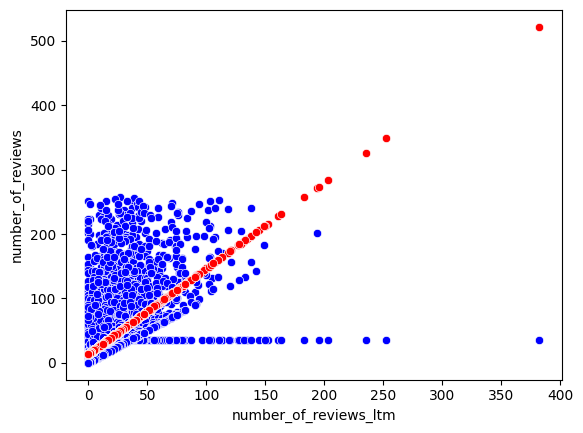

In [83]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = df_Private)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'PredictFinal', color = "red", data = df_Private)

In [84]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.5734108571797665